In [53]:
"""PREDICTING STARS,GALAXIES AND QUASARS"""

""" IMPORTANT LIBRARIES IMPORT"""
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [55]:
'''Measuring Classification Performance'''
from sklearn.metrics import accuracy_score

In [56]:
'''Classification & Regression'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [57]:
'''Ignore warnings'''
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

The **dataset** we'll be using for this model is the Sloan Digital Sky Survey DR14
**link**  :- https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Flucidlenn%2Fsloan-digital-sky-survey

In [58]:
data = pd.read_csv("/content/Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [59]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [60]:
data.shape

(10000, 18)

In [61]:
data.drop(['objid','specobjid'],axis = 1, inplace = True)

In [62]:
data.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512


In [63]:
data.shape

(10000, 16)

In [64]:
data.describe()


,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


In [66]:
l_encod= LabelEncoder().fit(data['class'])
data['class'] = l_encod.transform(data['class'])

In [67]:
data.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512


After lable encoding, Galaxies have been replaced by number 0, Quasars by number 1 and Stars by number 2 ..according to alphabetical names the code 0,1,2 has been given that can be see in class feature of the table




In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  int64  
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 1.2 MB


Now all the feature columns has been converted to num now doing train and test data split.

In [69]:
X = data.drop('class', axis = 1)
y = data['class']


# **DATA SCALING**

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
X= scaler.fit_transform(X)

In [71]:
#checking for the scale data points
X[:18]

array([[ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
        -0.94605772, -0.99534154, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36973112,  1.03148936,  1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, -0.16653251, -0.15415531,
        -0.08264457, -0.02604308, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36984929, -0.63621258, -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796,  0.86709322,  0.59315368,
         0.44120145,  0.31452753, -0.83806089,  0.        ,  0.21085172,
        -0.21147922, -0.05302706, -0.65633905, -0.60919097,  0.77527888],
       [ 0.17455754, -0.58650069, -1.03063038, -0.81362749, -0.63669227,
        -0.52660429, -0.43092107, -0.83806089,  0.        ,  0.21085172,
        -0.20532801, -0.36999261,  1.03148936,  1.30931064,  0.76073609],
       [ 0.17482457, -0.58441247, -1.29023238, -1.17251944, -0.37676237,
        -0.02510121,  0.15827647, -0.83806089, 

TESTING THE DATA

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

Density distribution plot


<Axes: xlabel='class', ylabel='count'>

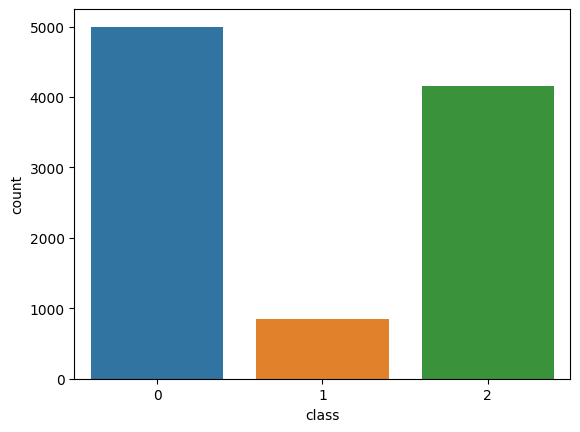

In [73]:
sns.countplot(x=data['class'])

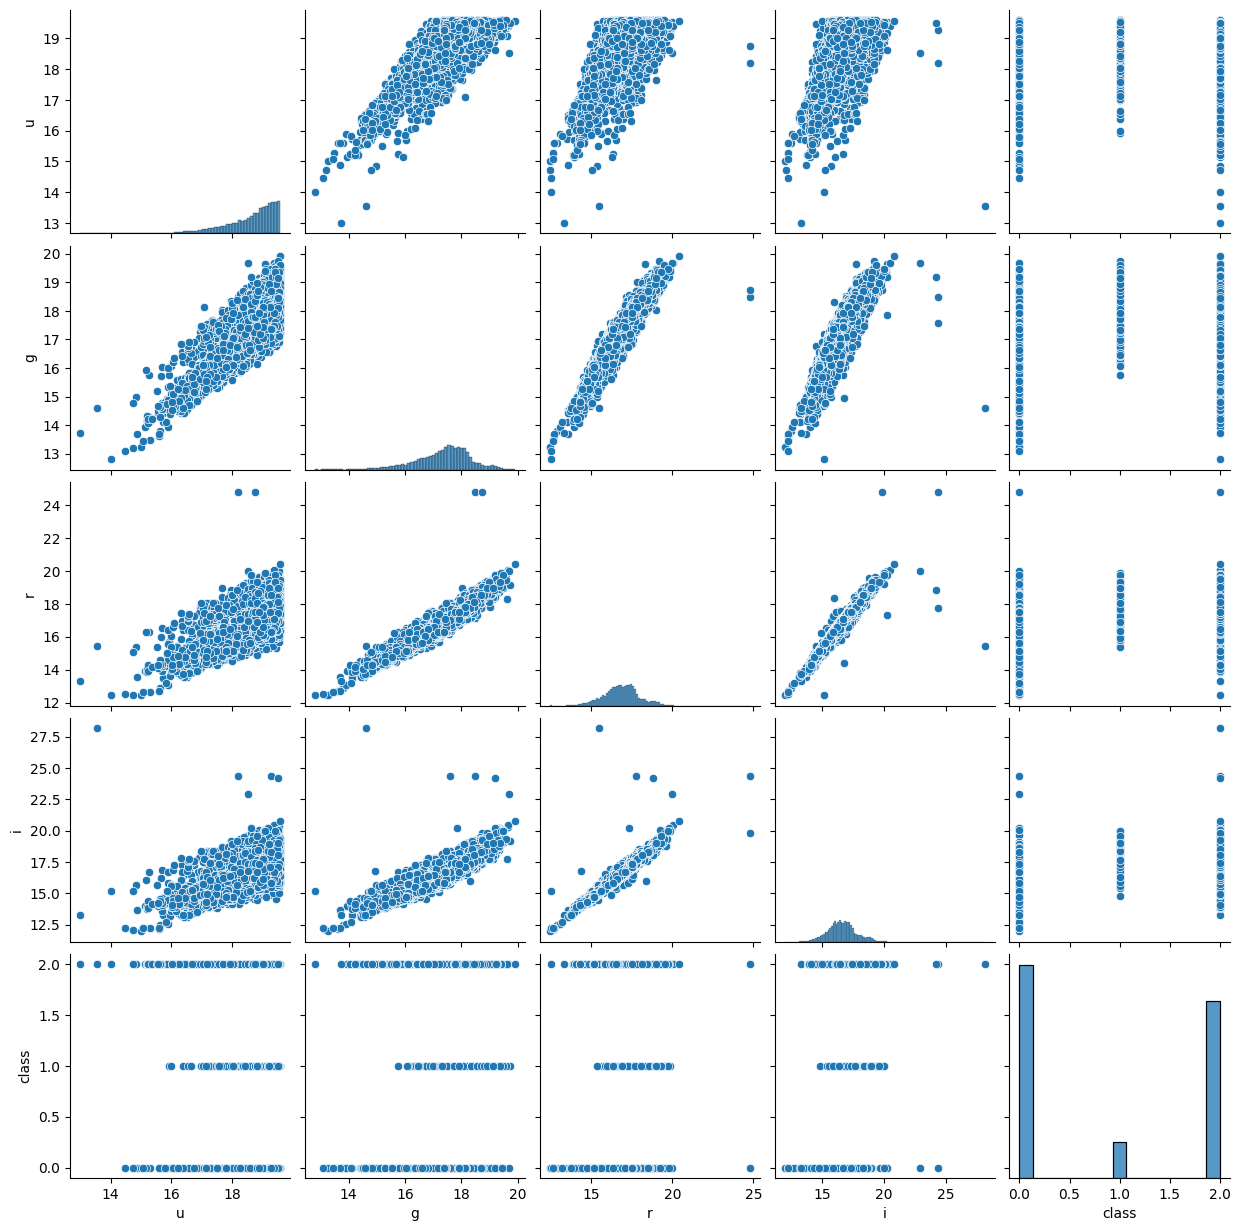

In [74]:
sns.pairplot(data[['u','g','r','i','class']])

ClASSIFICATION MODELS

In [75]:
# Decision Tree Classifier
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)

In [76]:
#Linear Classifier - Logistic Regression
LRClassifer = LogisticRegression()

In [77]:
#Nearest Neighbor Classifier
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)

In [78]:
#Fitting the models to the dataset
dtClassifer.fit(X_train, y_train)

LRClassifer.fit(X_train, y_train)

NeNeClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [79]:
#Getting the prediction set of the models
y_preds = dtClassifer.predict(X_test)
y_predsLR = LRClassifer.predict(X_test)
y_predsNeNe = NeNeClassifier.predict(X_test)

In [80]:
#Displaying the last 10 predictions on the test split as output by all the models

print(y_preds[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsLR[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsNeNe[:10],'\n',y_test[:10])

[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64

*******************************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64

*******************************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64


In [81]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']

print('\033[1m  Decision Tree -\n  \033[0m',classification_report(y_preds,y_test,target_names=target_names) + '\n')
print('\033[1m  Linear Regression -\n  \033[0m',classification_report(y_predsLR,y_test,target_names=target_names) + '\n')
print("\033[1m  KNN Classifier -\n  \033[0m",classification_report(y_predsNeNe,y_test,target_names=target_names) + '\n')

  Decision Tree -
                 precision    recall  f1-score   support

           0       0.99      0.99      0.99      1504
           1       0.94      0.98      0.96       255
           2       1.00      1.00      1.00      1241

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000


  Linear Regression -
                 precision    recall  f1-score   support

           0       0.97      0.99      0.98      1469
           1       0.94      0.97      0.96       258
           2       0.99      0.96      0.98      1273

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


  KNN Classifier -
                 precision    recall  f1-score   support

           0       0.94      0.89      0.91      1575
           1       0.88      0.97      0.92       240
     

# **VISUALIZING THE DECISION TREE **

In [82]:
from sklearn import tree


[Text(0.5, 0.875, 'x[11] <= -0.366\ngini = 0.569\nsamples = 7000\nvalue = [3501, 584, 2915]'),
 Text(0.25, 0.625, 'x[2] <= 1.154\ngini = 0.012\nsamples = 2928\nvalue = [17, 0, 2911]'),
 Text(0.125, 0.375, 'x[4] <= -2.373\ngini = 0.01\nsamples = 2887\nvalue = [14, 0, 2873]'),
 Text(0.0625, 0.125, 'gini = 0.128\nsamples = 29\nvalue = [2, 0, 27]'),
 Text(0.1875, 0.125, 'gini = 0.008\nsamples = 2858\nvalue = [12, 0, 2846]'),
 Text(0.375, 0.375, 'x[2] <= 1.155\ngini = 0.136\nsamples = 41\nvalue = [3, 0, 38]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.095\nsamples = 40\nvalue = [2, 0, 38]'),
 Text(0.75, 0.625, 'x[11] <= 0.19\ngini = 0.247\nsamples = 4072\nvalue = [3484, 584, 4]'),
 Text(0.625, 0.375, 'x[3] <= 1.116\ngini = 0.027\nsamples = 3513\nvalue = [3465, 44, 4]'),
 Text(0.5625, 0.125, 'gini = 0.017\nsamples = 3449\nvalue = [3419, 26, 4]'),
 Text(0.6875, 0.125, 'gini = 0.404\nsamples = 64\nvalue = [46, 18, 0]'),
 Text(0.875, 0.37

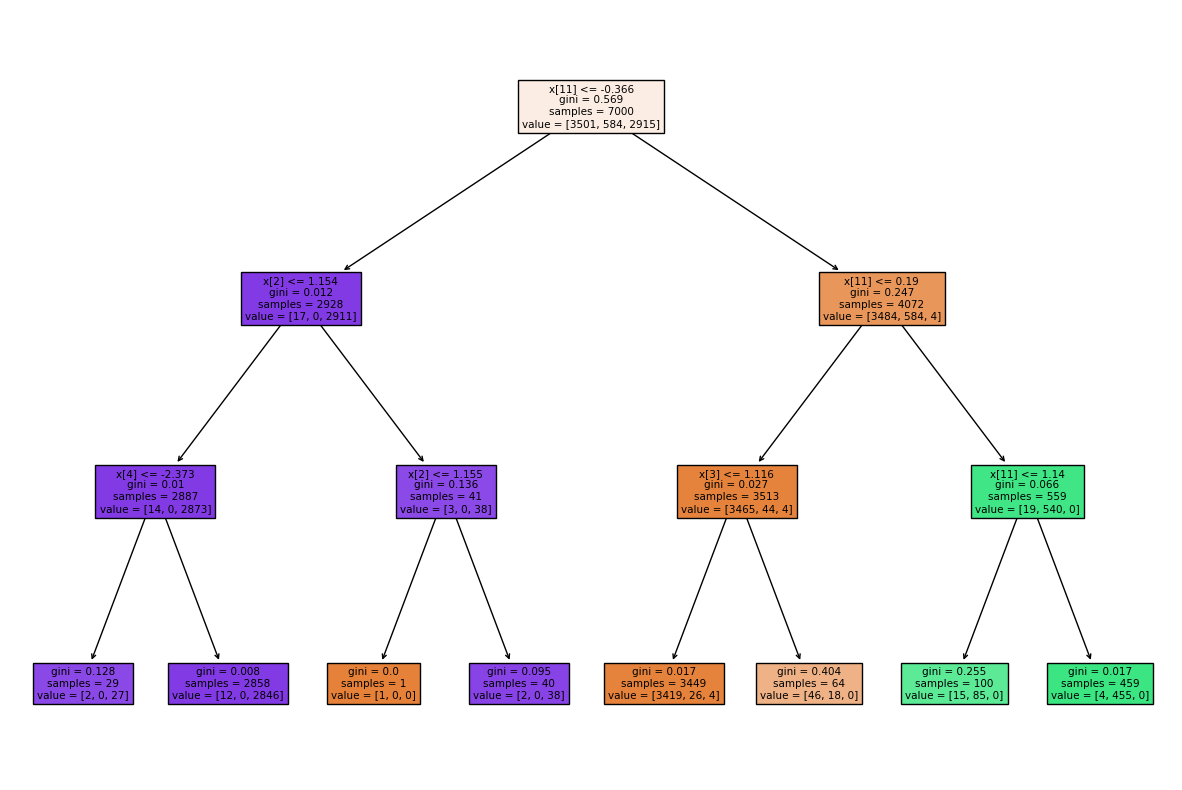

In [83]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtClassifer,filled = True)

In [84]:
print(tree.export_text(dtClassifer))

|--- feature_11 <= -0.37
|   |--- feature_2 <= 1.15
|   |   |--- feature_4 <= -2.37
|   |   |   |--- class: 2
|   |   |--- feature_4 >  -2.37
|   |   |   |--- class: 2
|   |--- feature_2 >  1.15
|   |   |--- feature_2 <= 1.15
|   |   |   |--- class: 0
|   |   |--- feature_2 >  1.15
|   |   |   |--- class: 2
|--- feature_11 >  -0.37
|   |--- feature_11 <= 0.19
|   |   |--- feature_3 <= 1.12
|   |   |   |--- class: 0
|   |   |--- feature_3 >  1.12
|   |   |   |--- class: 0
|   |--- feature_11 >  0.19
|   |   |--- feature_11 <= 1.14
|   |   |   |--- class: 1
|   |   |--- feature_11 >  1.14
|   |   |   |--- class: 1



In [85]:
svClassifier = SVC(kernel = 'linear')
svClassifier.fit(X_train, y_train)


SVC(kernel='linear')

In [86]:
from sklearn.metrics import accuracy_score
y_pred = svClassifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9816666666666667

Question 2

In [106]:
data.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,2,0.000590,3306,54922,512


In [97]:
data1 = data.drop(['rerun'],axis = 1, inplace = True)

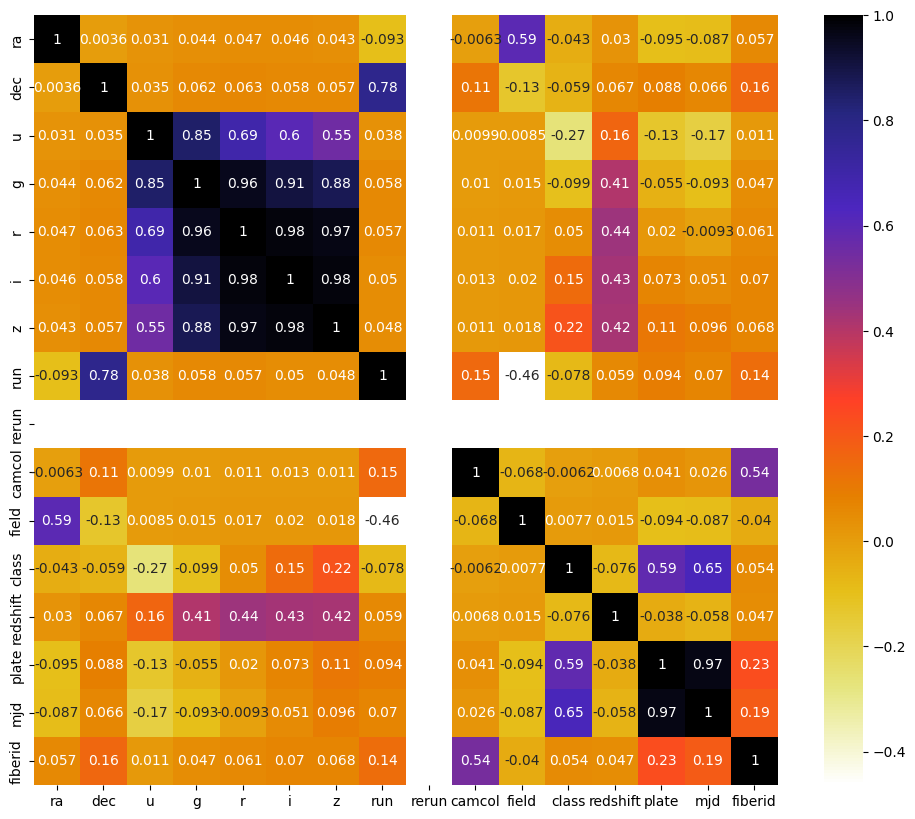

In [96]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [99]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [103]:
corr_features1 = correlation(data, 0.8)
len(set(corr_features1))

5

In [104]:
corr_features2 = correlation(data, 0.9)
len(set(corr_features2))

4

In [105]:
corr_features3 = correlation(data, 0.95)
len(set(corr_features3))

4

In [107]:
corr_features1

{'g', 'i', 'mjd', 'r', 'z'}

In [108]:
corr_features2

{'i', 'mjd', 'r', 'z'}

In [109]:
corr_features3

{'i', 'mjd', 'r', 'z'}